In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from ydata_profiling import ProfileReport

Archivo: Int_penetracion

Accesos a banda ancha y banda angosta por provincia

Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares y aceso Accesos por cada 100 hab

In [2]:
df = pd.read_csv("data_original\Internet_Penetracion_hogar_habitante.csv")
df

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021
5,2021,2,"69,24","21,55",Abr-Jun 2021
6,2021,1,"67,95","21,13",Ene-Mar 2021
7,2020,4,"67,62","21,01",Oct-Dic 2020
8,2020,3,"66,31","20,59",Jul-Sept 2020
9,2020,2,"64,21","19,92",Abr-Jun 2020


In [3]:
#Cambiar nombre de columnas
df.rename(columns={'Accesos por cada 100 hab': 'Acs_x_c_100_Hab'}, inplace=True)
df.rename(columns={'Accesos por cada 100 hogares': 'Acs_x_c_100_Hogares'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  35 non-null     int64 
 1   Trimestre            35 non-null     int64 
 2   Acs_x_c_100_Hogares  35 non-null     object
 3   Acs_x_c_100_Hab      35 non-null     object
 4   Periodo              35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


cambio de tipo de dato en las columnas

In [5]:
df['Acs_x_c_100_Hogares'] = df['Acs_x_c_100_Hogares'].str.replace(',', '.').astype(float)
df['Acs_x_c_100_Hab'] = df['Acs_x_c_100_Hab'].str.replace(',', '.').astype(float)
df['Año'] = df['Año'].astype('str')
df['Trimestre'] = df['Trimestre'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Año                  35 non-null     object  
 1   Trimestre            35 non-null     category
 2   Acs_x_c_100_Hogares  35 non-null     float64 
 3   Acs_x_c_100_Hab      35 non-null     float64 
 4   Periodo              35 non-null     object  
dtypes: category(1), float64(2), object(2)
memory usage: 1.5+ KB


In [7]:
df.describe()#resumen estadistico

,Acs_x_c_100_Hogares,Acs_x_c_100_Hab
count,35.000000,35.000000
mean,60.275429,18.606286
std,8.148909,2.662968
min,49.550000,15.050000
25%,52.985000,16.245000
50%,59.160000,18.240000
75%,66.050000,20.475000
max,76.640000,23.950000


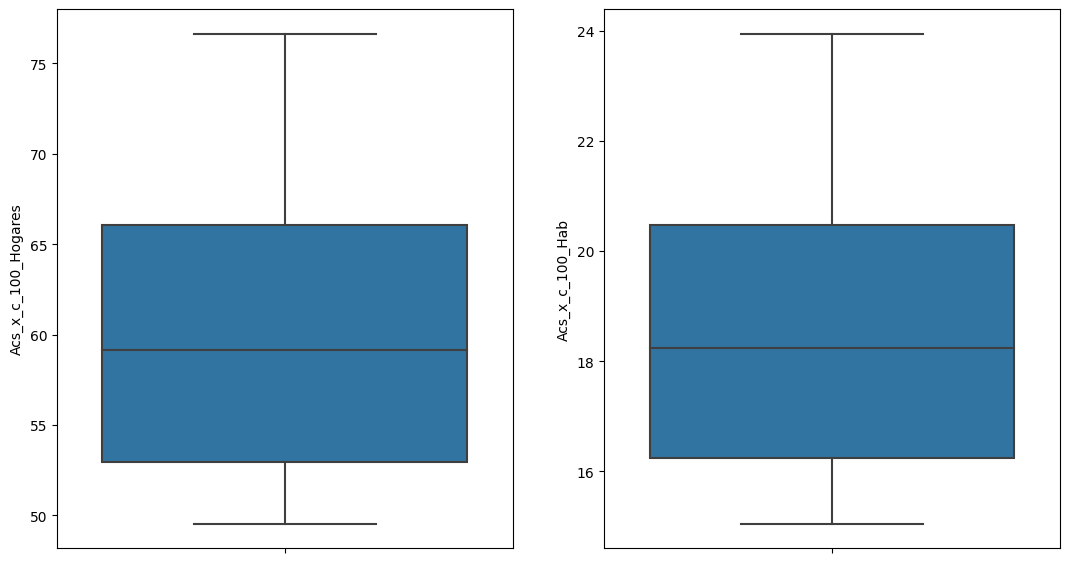

In [8]:
fig=plt.figure(figsize=(20,7))

ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)


sns.boxplot(data=df,y='Acs_x_c_100_Hogares',ax=ax1);
sns.boxplot(data=df,y='Acs_x_c_100_Hab',ax=ax2);

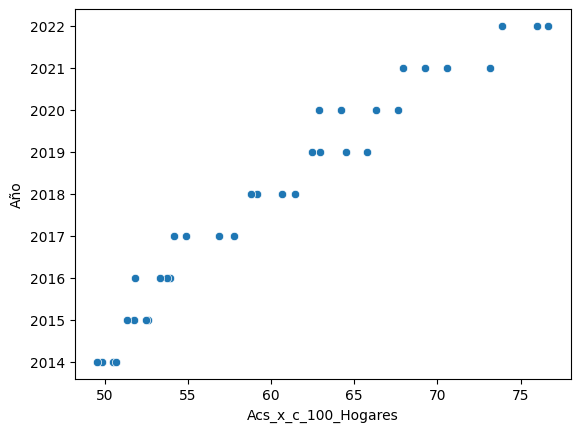

In [9]:
ax = sns.scatterplot(x="Acs_x_c_100_Hogares", y="Año", data=df)

_No se observan valores atipicos

_Aumento  anual sostenido de cantidad de hogares con intenet

_El ultimo año el valor maximo llego 76 hogares

In [10]:
# Tomamos como coordenadas en x los acseso por cada 100 habitantes
x = df['Acs_x_c_100_Hab'].values
# Tomamos como coordenadas el año
y = df['Año'].values


[Text(0.5, 0, 'habitantes'), Text(0, 0.5, 'años')]

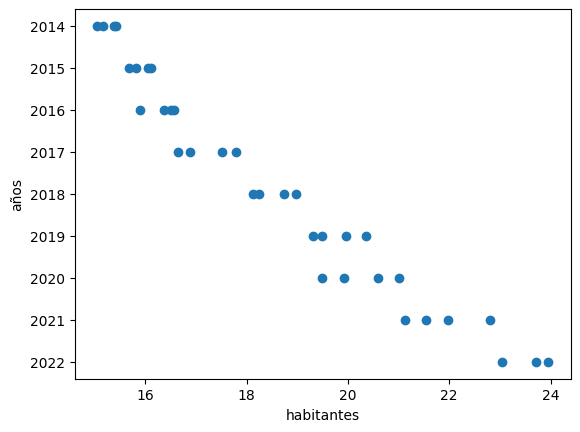

In [11]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='habitantes', ylabel='años')

-No se observan valores atipicos

-valor mas altos ronda alrededor de 24

-Observamos que va aumentando la cantidad de acseso por cada 100 habitantes, observando el minimo mayor a 9 

In [12]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


# Conclussiones

_NO se observan valores faltantes ni nulos en las columnas

_No se observan valores atipicos

_Se observa un aumento anual de la cantidad de hogares con intenet todos los años

_No se observan valores atipicos en las columnas 

_En la columna Acs_x_c_100_Hab el valor mas altos ronda alrededor de 24

_Observamos que va aumentando la cantidad de acseso por cada 100 habitantes, observando el minimo mayor a 9 

In [13]:
#importar df
df.to_csv('penetracion_hog_hab.csv', index=False)